In [72]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
df = pd.read_csv(r"D:\prepare\employee_turnover_data.csv")
df.head()

,employee_id,salary,satisfaction_score,worklife_balance,years_at_company,promotions,department,education,left_company
0,1,57669,2,4,1,0,Support,PhD,0
1,2,67963,4,2,9,4,Marketing,PhD,0
2,3,42263,2,1,15,5,Support,High School,0
3,4,45658,5,3,7,3,Support,Bachelors,0
4,5,92449,1,1,11,3,Engineering,PhD,0


In [36]:
# Basic inspection
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   employee_id         1000 non-null   int64 
 1   salary              1000 non-null   int64 
 2   satisfaction_score  1000 non-null   int64 
 3   worklife_balance    1000 non-null   int64 
 4   years_at_company    1000 non-null   int64 
 5   promotions          1000 non-null   int64 
 6   department          1000 non-null   object
 7   education           1000 non-null   object
 8   left_company        1000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 70.4+ KB


employee_id           0
salary                0
satisfaction_score    0
worklife_balance      0
years_at_company      0
promotions            0
department            0
education             0
left_company          0
dtype: int64

In [37]:
# Drop identifier
df.drop(columns=["employee_id"], inplace=True)

In [38]:
target = "left_company"

In [39]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(
    df,
    columns=["department", "education"],
    drop_first=True
)

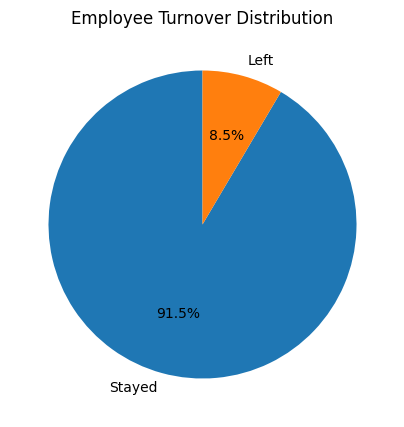

In [40]:
# Turnover distribution
turnover_counts = df["left_company"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    turnover_counts,
    labels=["Stayed", "Left"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Employee Turnover Distribution")
plt.show()

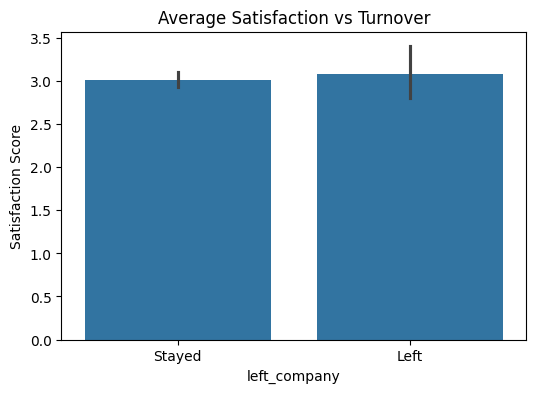

In [41]:
# Satisfaction vs turnover
plt.figure(figsize=(6,4))
sns.barplot(
    x="left_company",
    y="satisfaction_score",
    data=df,
    estimator=np.mean
)
plt.xticks([0,1], ["Stayed", "Left"])
plt.title("Average Satisfaction vs Turnover")
plt.ylabel("Satisfaction Score")
plt.show()

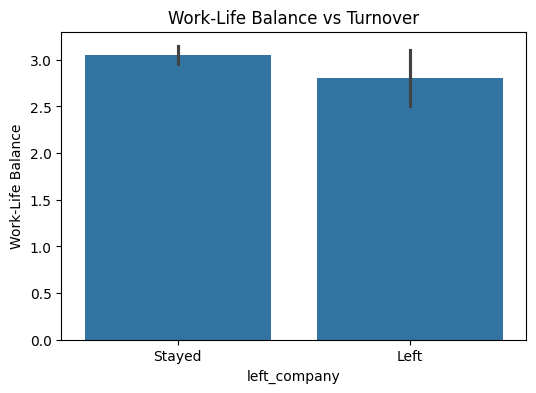

In [42]:
# Work-life balance vs turnover
plt.figure(figsize=(6,4))
sns.barplot(
    x="left_company",
    y="worklife_balance",
    data=df,
    estimator=np.mean
)
plt.xticks([0,1], ["Stayed", "Left"])
plt.title("Work-Life Balance vs Turnover")
plt.ylabel("Work-Life Balance")
plt.show()

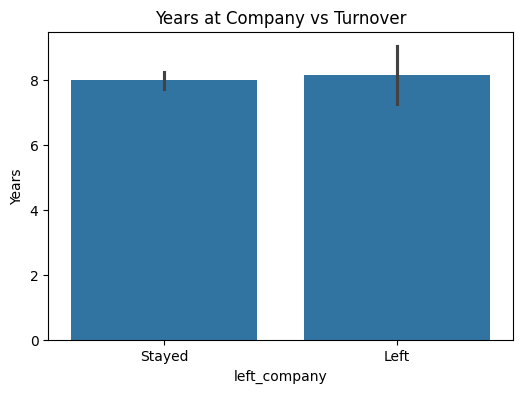

In [43]:
# Years at company vs turnover
plt.figure(figsize=(6,4))
sns.barplot(
    x="left_company",
    y="years_at_company",
    data=df,
    estimator=np.mean
)
plt.xticks([0,1], ["Stayed", "Left"])
plt.title("Years at Company vs Turnover")
plt.ylabel("Years")
plt.show()

In [65]:
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [66]:
numeric_features = [
    "salary",
    "satisfaction_score",
    "worklife_balance",
    "years_at_company",
    "promotions"
]

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [67]:
model = LogisticRegression(
    class_weight="balanced",
    solver="liblinear",
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [68]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.54


In [73]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[130  99]
 [ 16   5]]


In [74]:
print(classification_report(
    y_test,
    y_pred,
    target_names=["Stayed", "Left"]
))

              precision    recall  f1-score   support

      Stayed       0.89      0.57      0.69       229
        Left       0.05      0.24      0.08        21

    accuracy                           0.54       250
   macro avg       0.47      0.40      0.39       250
weighted avg       0.82      0.54      0.64       250

